In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Data Colllection and Analysis
#loading data from csv file to pandas dataframe
Insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
#first 5 rows of dataframe
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
#number of rows and columns in dataframe
Insurance_dataset.shape

(1338, 7)

In [6]:
#getting some information in dataset
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Categorical features- sex,smoker,region

In [8]:
# checking for missing values
Insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Data Analysis 

In [10]:
#Statistical Measures of the dataset
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


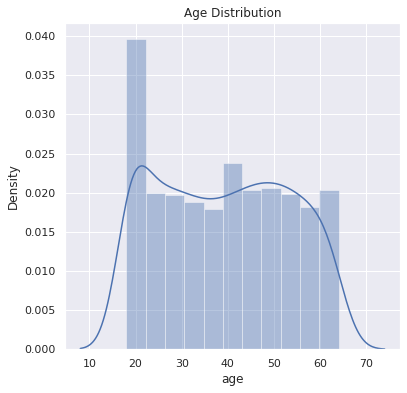

In [11]:
 #distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

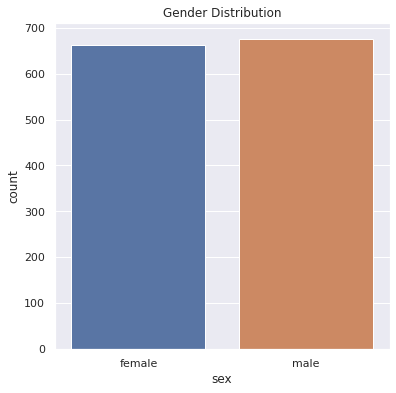

In [12]:
#distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data= Insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [13]:
Insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


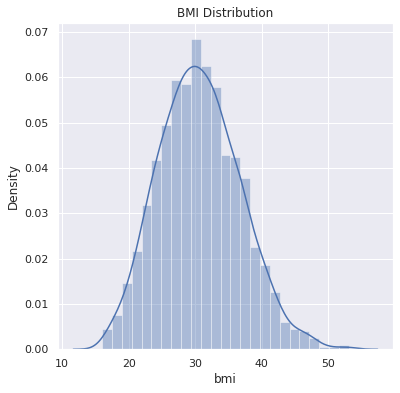

In [14]:
#distribution of bmi column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [15]:
#Normal BMI range is 18.5 to 24.9
#Most of the people in this dataset are overweight 
#normal distribution

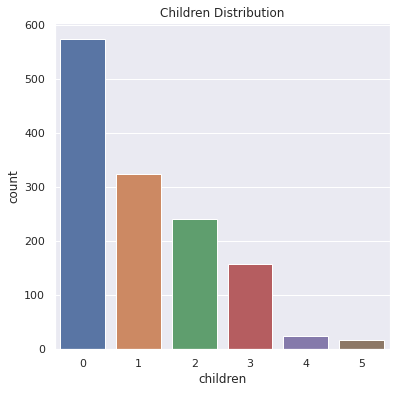

In [16]:
#distribution of children column
#since only 5 values for children, so we can use count plot
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=Insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [17]:
#more number of people are having no children, number of people with 1 child is more than others

In [18]:
Insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

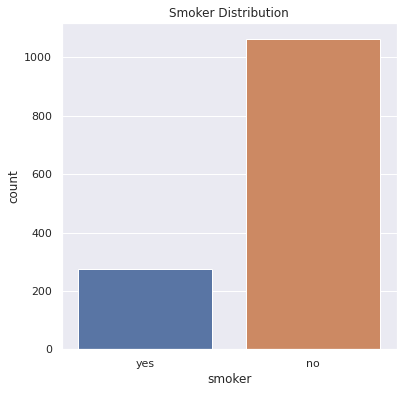

In [19]:
#distribution of smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=Insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [20]:
#more number of non-smoker here

In [21]:
Insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

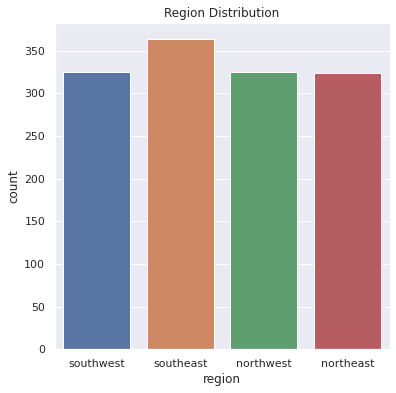

In [22]:
#distribution of region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=Insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [23]:
Insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


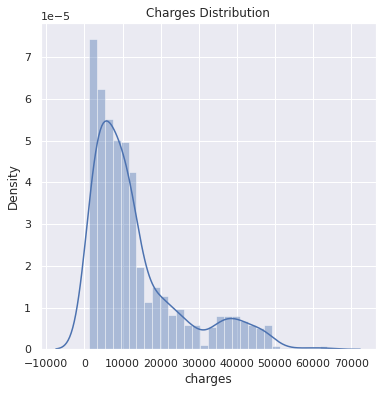

In [24]:
#distribution of charges column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [25]:
#Data Preprocessing
#Encoding Categorical Features

In [26]:
#encoding sex columns
Insurance_dataset.replace({'sex':{'male':0, 'female':1 }}, inplace=True)

In [27]:
#encoding smoker columns
Insurance_dataset.replace({'smoker':{'yes':0, 'no':1 }}, inplace=True)

In [28]:
#encoding region columns
Insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3 }}, inplace=True)

In [29]:
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86


In [30]:
#Splitting the features and target
X= Insurance_dataset.drop(columns='charges', axis=1)
Y= Insurance_dataset['charges']

In [31]:
print(X)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: charges, Length: 1338, dtype: float64


In [33]:
#splitting the data into Training data & Testing data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
#Model Training
#linear Regression 

In [37]:
#loading linear Regression Model
regressor = LinearRegression()

In [38]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#Model Evaluation

In [40]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)
training_data_prediction

array([  466.26144306,  9326.34221805, 13193.52438626, ...,
       17327.82924773,  9599.9213479 , 13754.82680941])

In [41]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train 

0.7515233180624387

In [42]:
#prediction on testing data

In [43]:
testing_data_prediction = regressor.predict(X_test)

In [44]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
r2_test

0.7447382074449773

In [45]:
#Buildind the Predicting System

In [46]:
input_data = (31,1,25.74,0,1,0)
#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
prediction

array([3759.33603725])

In [47]:
print('The insurance is USD', prediction[0])

The insurance is USD 3759.336037250352
